## Sentiment Analysis for Donald Trump 
@realDonaldTrump in Twitter </p>
@NicolasMaduro in Twitter

Fork: https://dev.to/rodolfoferro/sentiment-analysis-on-trumpss-tweets-using-python-

In [1]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Twitter App access keys for @user

# Consume:
CONSUMER_KEY    = 'fO9NYxYUv1t570Hs47a7QXDXV'
CONSUMER_SECRET = 'n4RoV93Z2bYpSrqEK32o3hj5n0jXnkYhYTnsmXVhD8hItb22yb'

# Access:
ACCESS_TOKEN  = '298729550-eksp6aFazmlOErMtrd4KqLEgIg5ttWHU5AmAb2ki'
ACCESS_SECRET = 'RdvUZYsgGRBG2OWZxd08tlZpumuAWeCU5z48PGjdQbZrV'

In [4]:
# We import our access keys:
#from credentials import *    # This will allow us to use the keys as variables

# API's setup:
def twitter_setup():
    """
    Utility function to setup the Twitter's API
    with our access keys provided.
    """
    # Authentication and access using keys:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Return API with authentication:
    api = tweepy.API(auth)
    return api

In [42]:
# We create an extractor object:
extractor = twitter_setup()

# We create a tweet list as follows:
tweets = extractor.user_timeline(screen_name="realDonaldTrump", count=100)
print("Number of tweets extracted: {}.\n".format(len(tweets)))

# We print the most recent 5 tweets:
print("5 recent tweets:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Number of tweets extracted: 100.

5 recent tweets:

I was a big fan of Frank Robinson, both as a great player and man. He was the first African American manager in bas… https://t.co/Nhe4v705Gr

Deepest sympathies to Congresswoman Debbie Dingell and the entire family of John Dingell. Longest serving Congressm… https://t.co/wbvzKXJCR7

Working hard, thank you! https://t.co/tnuHnw8kll

...It is all a GIANT AND ILLEGAL HOAX, developed long before the election itself, but used as an excuse by the Demo… https://t.co/unCVqZ2Bnp

The mainstream media has refused to cover the fact that the head of the VERY important Senate Intelligence Committe… https://t.co/5kJEIsX5Dt



In [24]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

,Tweets
0,"I was a big fan of Frank Robinson, both as a g..."
1,Deepest sympathies to Congresswoman Debbie Din...
2,"Working hard, thank you! https://t.co/tnuHnw8kll"
3,"...It is all a GIANT AND ILLEGAL HOAX, develop..."
4,The mainstream media has refused to cover the ...
5,Now we find out that Adam Schiff was spending ...
6,Not only did Senator Burr’s Committee find No ...
7,"Highly respected Senator Richard Burr, Chairma..."
8,So nice how well my State of the Union speech ...
9,"Each year, America pauses to remember its fall..."


In [25]:
# Internal methods of a single tweet object:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [26]:
# We print info from the first tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1093966532558929922
2019-02-08 20:15:20
Twitter for iPhone
56602
9666
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Nhe4v705Gr', 'expanded_url': 'https://twitter.com/i/web/status/1093966532558929922', 'display_url': 'twitter.com/i/web/status/1…', 'indices': [117, 140]}]}


In [27]:
# We add relevant data:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [28]:
# Display of first 10 elements from dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,"I was a big fan of Frank Robinson, both as a g...",140,1093966532558929922,2019-02-08 20:15:20,Twitter for iPhone,56602,9666
1,Deepest sympathies to Congresswoman Debbie Din...,140,1093965968253087744,2019-02-08 20:13:06,Twitter for iPhone,31553,5667
2,"Working hard, thank you! https://t.co/tnuHnw8kll",48,1093965250142056448,2019-02-08 20:10:15,Twitter for iPhone,46046,10395
3,"...It is all a GIANT AND ILLEGAL HOAX, develop...",140,1093871865246961666,2019-02-08 13:59:10,Twitter for iPhone,99312,22097
4,The mainstream media has refused to cover the ...,140,1093869087908941827,2019-02-08 13:48:08,Twitter for iPhone,74274,20612
5,Now we find out that Adam Schiff was spending ...,140,1093867361713704960,2019-02-08 13:41:16,Twitter for iPhone,68446,22700
6,Not only did Senator Burr’s Committee find No ...,140,1093847784573280256,2019-02-08 12:23:29,Twitter for iPhone,69312,18348
7,"Highly respected Senator Richard Burr, Chairma...",140,1093692376093216769,2019-02-08 02:05:56,Twitter for iPhone,134799,31542
8,So nice how well my State of the Union speech ...,77,1093661397769248769,2019-02-08 00:02:51,Twitter for iPhone,188564,27061
9,"Each year, America pauses to remember its fall...",140,1093661112724262912,2019-02-08 00:01:43,Twitter for iPhone,64789,13152


In [29]:
# We extract the mean of lenghts:
mean = np.mean(data['len'])

print("The lenght's average in tweets: {}".format(mean))

The lenght's average in tweets: 122.965


In [30]:
# We extract the tweet with more FAVs and more RTs:

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max FAVs:
print("The tweet with more likes is: \n{}".format(data['Tweets'][fav]))
print("Number of likes: {}".format(fav_max))
print("{} characters.\n".format(data['len'][fav]))

# Max RTs:
print("The tweet with more retweets is: \n{}".format(data['Tweets'][rt]))
print("Number of retweets: {}".format(rt_max))
print("{} characters.\n".format(data['len'][rt]))

The tweet with more likes is: 
Numerous states introducing Bible Literacy classes, giving students the option of studying the Bible. Starting to make a turn back? Great!
Number of likes: 256420
138 characters.

The tweet with more retweets is: 
The citizens of Venezuela have suffered for too long at the hands of the illegitimate Maduro regime. Today, I have… https://t.co/6pcpLqVzaQ
Number of retweets: 81143
139 characters.



In [31]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

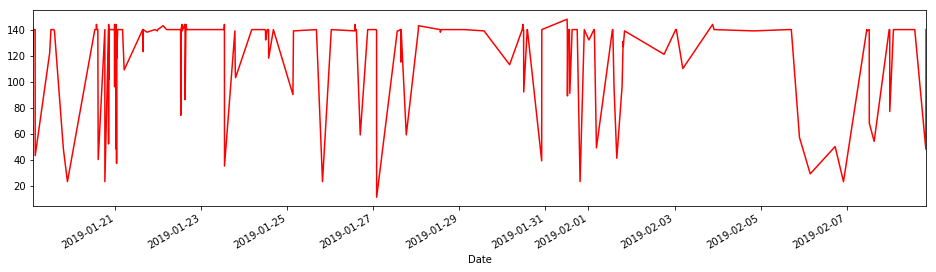

In [32]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

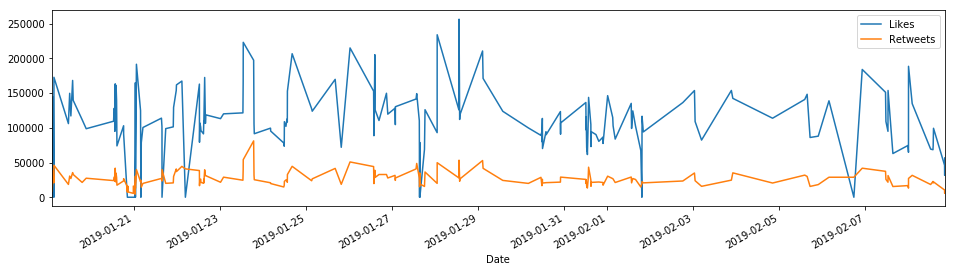

In [33]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [34]:
# We obtain all possible sources:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# We print sources list:
print("Creation of content sources:")
for source in sources:
    print("* {}".format(source))

Creation of content sources:
* Twitter for iPhone


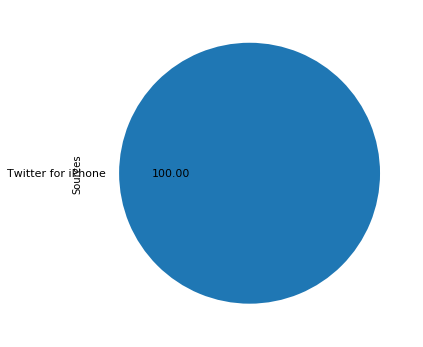

In [35]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## SENTIMENT ANALYSIS

In [43]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [44]:
# We create a column with the result of the analysis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# We display the updated dataframe with the new column:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,"I was a big fan of Frank Robinson, both as a g...",140,1093966532558929922,2019-02-08 20:15:20,Twitter for iPhone,56602,9666,1
1,Deepest sympathies to Congresswoman Debbie Din...,140,1093965968253087744,2019-02-08 20:13:06,Twitter for iPhone,31553,5667,0
2,"Working hard, thank you! https://t.co/tnuHnw8kll",48,1093965250142056448,2019-02-08 20:10:15,Twitter for iPhone,46046,10395,-1
3,"...It is all a GIANT AND ILLEGAL HOAX, develop...",140,1093871865246961666,2019-02-08 13:59:10,Twitter for iPhone,99312,22097,-1
4,The mainstream media has refused to cover the ...,140,1093869087908941827,2019-02-08 13:48:08,Twitter for iPhone,74274,20612,1
5,Now we find out that Adam Schiff was spending ...,140,1093867361713704960,2019-02-08 13:41:16,Twitter for iPhone,68446,22700,0
6,Not only did Senator Burr’s Committee find No ...,140,1093847784573280256,2019-02-08 12:23:29,Twitter for iPhone,69312,18348,1
7,"Highly respected Senator Richard Burr, Chairma...",140,1093692376093216769,2019-02-08 02:05:56,Twitter for iPhone,134799,31542,1
8,So nice how well my State of the Union speech ...,77,1093661397769248769,2019-02-08 00:02:51,Twitter for iPhone,188564,27061,1
9,"Each year, America pauses to remember its fall...",140,1093661112724262912,2019-02-08 00:01:43,Twitter for iPhone,64789,13152,1


In [45]:
# We construct lists with classified tweets:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

In [46]:
# We print percentages:

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentage de negative tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentage of positive tweets: 50.5%
Percentage of neutral tweets: 30.5%
Percentage de negative tweets: 19.0%
